### Preparing data


In [1]:
# Importing needed libraries.
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Reading datasets from .csv files.

In [2]:
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

Let's get some info about our datasets.

In [3]:
print("Number of rows in intakes.csv - ", intakes.shape[0])
print("Number of rows in outcomes.csv - ", outcomes.shape[0])
print()
print("Number of columns in intakes.csv - ", intakes.shape[1])
print("Number of columns in outcomes.csv - ", outcomes.shape[1])

Number of rows in intakes.csv -  138585
Number of rows in outcomes.csv -  138769

Number of columns in intakes.csv -  12
Number of columns in outcomes.csv -  12


In [4]:
print("Names of columns in intakes.csv:")
intakes.head(0)

Names of columns in intakes.csv:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color


In [5]:
print("Names of columns in outcomes.csv:")
outcomes.head(0)

Names of columns in outcomes.csv:


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color


We have 12 columns in each dataset:  

#### Intakes:  

Animal ID - Unique identifier of individual animals.    

Name - Name of the animal.  

DateTime - Timestamp of intake.    

MonthYear - derived version of the DateTime, specifically showing the month and year of the event.  

Found Location - the place where the animal was found.  

Intake Type - represents the circumstances or method by which the animal was taken in. For example, it could be a stray, owner surrender, or other intake types.  

Intake Condition - describes the general condition of the animal when it was taken in. It could indicate whether the animal was in good health, injured, sick, etc.  

Animal Type - indicates the broad category of the animal, such as whether it's a dog, cat, bird, etc.  

Sex upon Intake - epresents the sex and, if applicable, reproductive status of the animal at the time of intake. For example, whether it's neutered or spayed.  

Age upon Intake - age of the animal at the time of intake. 

Breed - breed or mix of breeds of the animal.  

Color - the color or pattern of the animal's fur or feathers.  

#### Outcomes:  

It has alsmost the same features, beside Data of Birth, Outcome Subtype and some features just represent not intake but outcome information.

For getting info about datatypes of features in our datasets we can use method .info().  
  
In intakes.csv all features have type object. Most of columns does not have Null values, beside "Sex upon Intake" (1 Null) and "Name" (41269 Null / ~ 29.8 %).  

In outcomes.csv all features have type object. Most of columns does not have Null values, beside "Name" (41255 Null / ~ 29.72 %), "Outcome Type" (23 Null),  "Outcome Subtype" (75334 Null / ~ 45.7 %), "Sex upon Outcome" (1 Null) and "Age upon Outcome" (5 Null).

For our future statistics we won't use names of animals, so we can keep NaN values there.

In [6]:
print("Intakes:\n")
intakes.info()
print()
print("Outcomes:\n")
outcomes.info()

Intakes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB

Outcomes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ----

Function .nunique() will print a Series where the index represents the column names, and the values represent the number of unique values in each column.

In [7]:
print("Intakes:\n")
print(intakes.nunique())
print()
print("Outcomes:\n")
print(outcomes.nunique())

Intakes:

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

Outcomes:

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64


Missing values in each dataset are represented by NaN, so there is no need to explicitly rewrite them beside features Sex upon Intake and Sex upon Outcome where missing values is "Unknown" string. Because there are relatively large number of Unknown values in these features, let's keep them as category.

In [8]:
print("Unknown values in Sex upon Outcome - " + str(len(outcomes[outcomes["Sex upon Outcome"] == "Unknown"])))
print("Unknown values in Sex upon Intake - " + str(len(intakes[intakes["Sex upon Intake"] == "Unknown"])))

Unknown values in Sex upon Outcome - 11052
Unknown values in Sex upon Intake - 11069


Transforming features to categorical data type can be beneficial, especially when the columns have a limited set of unique values. We can identify categorical features with previous observation of unique values in each column.  

In intakes categorical features can be: Intake Type, Intake Condition, Animal Type, Sex upon Intake, Breed and Color. (it can be arguable about last two because of big number of unique values)

In outcomes: Outcome Type, Outcome Subtype, Animal Type, Sex upon Outcome, Breed and Color.

In [9]:
intakes[["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color"]] = intakes[["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color"]].astype("category")
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138585 non-null  object  
 1   Name              97316 non-null   object  
 2   DateTime          138585 non-null  object  
 3   MonthYear         138585 non-null  object  
 4   Found Location    138585 non-null  object  
 5   Intake Type       138585 non-null  category
 6   Intake Condition  138585 non-null  category
 7   Animal Type       138585 non-null  category
 8   Sex upon Intake   138584 non-null  category
 9   Age upon Intake   138585 non-null  object  
 10  Breed             138585 non-null  category
 11  Color             138585 non-null  category
dtypes: category(6), object(6)
memory usage: 7.5+ MB


In [10]:
outcomes[["Outcome Type", "Outcome Subtype", "Animal Type", "Sex upon Outcome", "Breed", "Color"]] = outcomes[["Outcome Type", "Outcome Subtype", "Animal Type", "Sex upon Outcome", "Breed", "Color"]].astype("category")
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138769 non-null  object  
 1   Name              97514 non-null   object  
 2   DateTime          138769 non-null  object  
 3   MonthYear         138769 non-null  object  
 4   Date of Birth     138769 non-null  object  
 5   Outcome Type      138746 non-null  category
 6   Outcome Subtype   63435 non-null   category
 7   Animal Type       138769 non-null  category
 8   Sex upon Outcome  138768 non-null  category
 9   Age upon Outcome  138764 non-null  object  
 10  Breed             138769 non-null  category
 11  Color             138769 non-null  category
dtypes: category(6), object(6)
memory usage: 7.5+ MB


Let's change Age upon Intake and Age upon Outcome from the object data type to the numeric. For that task we need to implement a special function...

In [11]:
# function that takes string (2 years, 3 months...) and transforms it to number of days
def transform_to_days(cell) -> int:
    if pd.isna(cell):
        return 0
    # group() returns the substring that was matched by the regular expression
    number = int(re.search('(\d+)', cell).group())
    period = re.search('([a-zA-Z]+)', cell).group()
    if period == "weeks" or period == "week":
        return number * 7
    elif period == "days" or period == "day":
        return number
    elif period == "months" or period == "month":
        return number * 4 * 7
    elif period == "years" or period == "year":
        return number * 12 * 4 * 7
    else:
        raise Exception("Invalid period")
        
# Apply the function and change to numeric
intakes["Age upon Intake"] = pd.to_numeric(intakes["Age upon Intake"].apply(transform_to_days))
outcomes["Age upon Outcome"] = pd.to_numeric(outcomes["Age upon Outcome"].apply(transform_to_days))

In [12]:
print("Animals from intakes with 0 days age - " + str(len(intakes[intakes["Age upon Intake"] == 0])))
print("Animals from outcomes with 0 days age - " + str(len(outcomes[outcomes["Age upon Outcome"] == 0])))

Animals from intakes with 0 days age - 889
Animals from outcomes with 0 days age - 214


There are some animals that have 0 days age, which can be missing values. It is relatively small number, which will not affect our future statistics so we can rewrite them for nan values and drop them later.

In [13]:
intakes["Age upon Intake"] = pd.to_numeric(intakes["Age upon Intake"].replace(0, pd.NA))
outcomes["Age upon Outcome"] = pd.to_numeric(outcomes["Age upon Outcome"].replace(0, pd.NA))

Let's change data type of feature DateTime to datetime64.

In [14]:
intakes["DateTime"] = pd.to_datetime(intakes["DateTime"], format='%m/%d/%Y %I:%M:%S %p')
outcomes["DateTime"] = pd.to_datetime(outcomes["DateTime"], format='%m/%d/%Y %I:%M:%S %p')

We can easily calculate Date of Birth with DateTime and Age of animal in outcomes dataset, but let's keep it by now in datetime64 dtype.

In [15]:
outcomes["Date of Birth"] = pd.to_datetime(outcomes["Date of Birth"], format='%m/%d/%Y')

Feature MonthYear is reduntant because it just duplicates month and year from DateTime column. Hence we can drop it.

In [16]:
intakes = intakes.drop("MonthYear", axis=1)
outcomes = outcomes.drop("MonthYear", axis=1)

We can drop duplicated rows with function drop_duplicates()

In [17]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

Let's drop rows where values are NaN in features: Age upon Intake/Outcome column (as we have discussed early), Sex upon Intake (just 1 row), Outcome Type (22 rows) and Sex upon Outcome. Other features with NaN values like name (we have discussed early, that we don't need it for our future statistics, so we can keep it) and Outcome Subtype has a large number of NaN values, so in case we need to deal with that feature, we will think about it, by far let's keep it.

In [18]:
intakes.dropna(subset=["Age upon Intake", "Sex upon Intake"], inplace=True)
outcomes.dropna(subset=["Age upon Outcome", "Sex upon Outcome", "Outcome Type"], inplace=True)

After dropping duplicates from a DataFrame, there can errors in order of Animal ID, let's reset it. 

In [19]:
intakes = intakes.reset_index(drop=True)
outcomes = outcomes.reset_index(drop=True)

Our datasets after preprocessing:

In [20]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137675 entries, 0 to 137674
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137675 non-null  object        
 1   Name              96956 non-null   object        
 2   DateTime          137675 non-null  datetime64[ns]
 3   Found Location    137675 non-null  object        
 4   Intake Type       137675 non-null  category      
 5   Intake Condition  137675 non-null  category      
 6   Animal Type       137675 non-null  category      
 7   Sex upon Intake   137675 non-null  category      
 8   Age upon Intake   137675 non-null  float64       
 9   Breed             137675 non-null  category      
 10  Color             137675 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), object(3)
memory usage: 6.4+ MB


In [21]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138515 entries, 0 to 138514
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138515 non-null  object        
 1   Name              97451 non-null   object        
 2   DateTime          138515 non-null  datetime64[ns]
 3   Date of Birth     138515 non-null  datetime64[ns]
 4   Outcome Type      138515 non-null  category      
 5   Outcome Subtype   63228 non-null   category      
 6   Animal Type       138515 non-null  category      
 7   Sex upon Outcome  138515 non-null  category      
 8   Age upon Outcome  138515 non-null  float64       
 9   Breed             138515 non-null  category      
 10  Color             138515 non-null  category      
dtypes: category(6), datetime64[ns](2), float64(1), object(2)
memory usage: 6.4+ MB


### Descriptive statistics 

With inspiration from the second lesson's jupyter notebook "03-eda_heart_attack" we can write a function which gives us univariate descriptive statistics for Age upon Intake and DateTime features.

In [22]:
def univariate_statistics_cont(df, column):
    print(column + ":\n")
    print("Minimal value - ", df[column].min())
    print("Maximal value - ", df[column].max())
    print("Range - " + str(df[column].max() - df[column].min()))
    print("Average - ", df[column].mean())
    print("Median - ", df[column].median())
    # datetime64[ns] does not support reduction 'var'
    if df[column].dtype != "datetime64[ns]":
        print("Variance - ", df[column].var())

We store in "Age upon Intakes" age in days, which arguibly can be confusing, the reason we do that - it is the smallest metric of this type of data which always gives us integer values without a lot of numbers after floating point as it could be in weeks, months or years, that could be even more confusing.

In [23]:
univariate_statistics_cont(intakes, "Age upon Intake")
print()
univariate_statistics_cont(intakes, "DateTime")

Age upon Intake:

Minimal value -  1.0
Maximal value -  10080.0
Range - 10079.0
Average -  686.336524423461
Median -  336.0
Variance -  924684.0661521155

DateTime:

Minimal value -  2013-10-01 07:51:00
Maximal value -  2022-04-27 07:54:00
Range - 3130 days 00:03:00
Average -  2017-09-02 13:00:19.427928064
Median -  2017-07-20 12:42:00


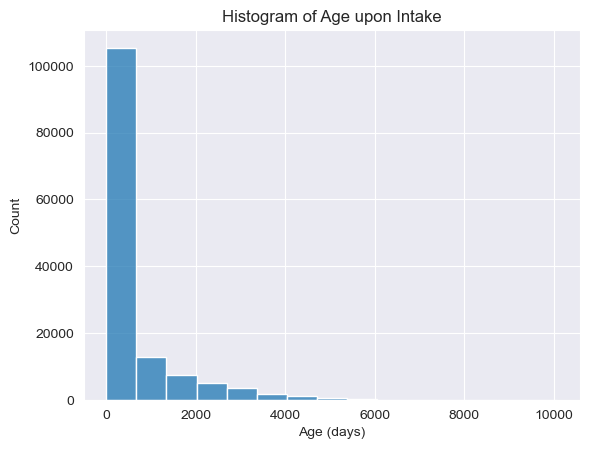

In [24]:
# setting up grid
sns.set_style("darkgrid")

# visualisation
sns.histplot(data=intakes, x="Age upon Intake", bins=15)

# labels
plt.title("Histogram of Age upon Intake")
plt.xlabel("Age (days)")
plt.ylabel("Count")

plt.show()

The right part of visualisation does not look good because of outliers from 6000 days to 10000, so we can group data by years 0...365 days, 365...730 days and so on to create nice looking bar plot. 

The largest age group is 0-1 year.

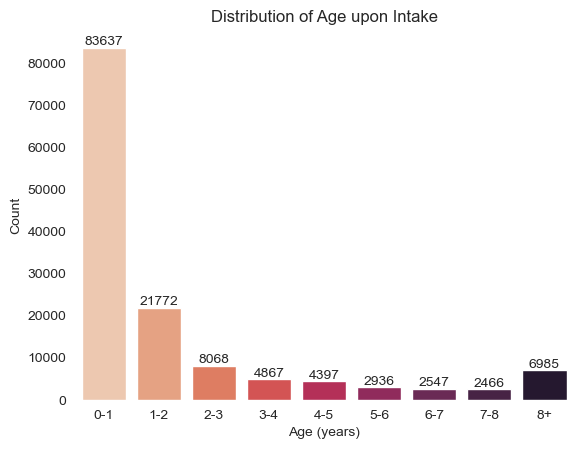

In [25]:
# specification of the bin edges
bin_edges = [0, 365, 730, 1095, 1460, 1825, 2190, 2555, 2920, float('inf')]

# labels for each bin
bin_labels = ["0-1","1-2","2-3","3-4","4-5","5-6","6-7", "7-8", "8+"]

df = pd.DataFrame()
df["Age Group"] = pd.cut(intakes["Age upon Intake"], bins=bin_edges, labels=bin_labels)

# group by the new column and count occurrences
grouped_data = df.groupby("Age Group").size()

sns.set_style("white")

ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="rocket_r")
ax.bar_label(ax.containers[0])

plt.title("Distribution of Age upon Intake")
plt.xlabel("Age (years)")
plt.ylabel("Count")

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

From histogram of DateTime we can notice that in the second half of the year are more intakes than in the first one, except 2020 year, which in total has less intakes and this trend continues.

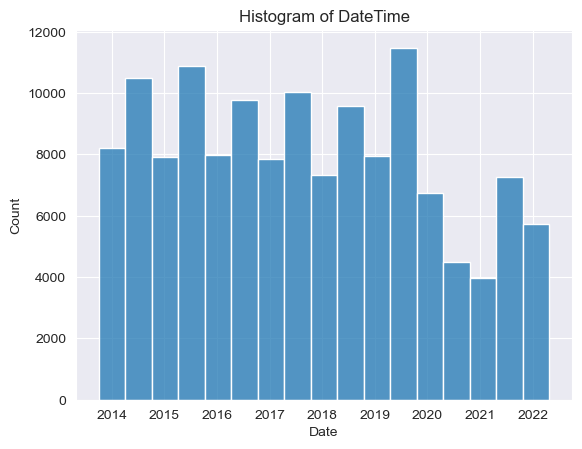

In [26]:
sns.set_style("darkgrid")
sns.histplot(data=intakes, x="DateTime", bins=17)

plt.title("Histogram of DateTime")
plt.xlabel("Date")
plt.ylabel("Count")

plt.show()

Let's make univariate descriptive statistics for three categorical features - Intake Type, Intake Condition, Sex upon Intake.

In [27]:
def univariate_statistics_cat(df, column):
    print("Frequency - " + str(df[column].value_counts()))
    print()
    print("Relative frequency - " + str(df[column].value_counts(normalize=True)))

In [28]:
univariate_statistics_cat(intakes, "Intake Type")
print()
univariate_statistics_cat(intakes, "Intake Condition")
print()
univariate_statistics_cat(intakes, "Sex upon Intake")

Frequency - Intake Type
Stray                 94552
Owner Surrender       28463
Public Assist          8302
Wildlife               5359
Abandoned               740
Euthanasia Request      259
Name: count, dtype: int64

Relative frequency - Intake Type
Stray                 0.686777
Owner Surrender       0.206741
Public Assist         0.060301
Wildlife              0.038925
Abandoned             0.005375
Euthanasia Request    0.001881
Name: proportion, dtype: float64

Frequency - Intake Condition
Normal        118872
Injured         7820
Sick            5990
Nursing         3551
Aged             463
Neonatal         285
Other            243
Medical          173
Feral            125
Pregnant          94
Behavior          49
Space              4
Med Attn           3
Med Urgent         2
Panleuk            1
Name: count, dtype: int64

Relative frequency - Intake Condition
Normal        0.863425
Injured       0.056800
Sick          0.043508
Nursing       0.025793
Aged          0.003363
Neon

The largest Intake type is stray, the smallest one is Euthanasia Request.

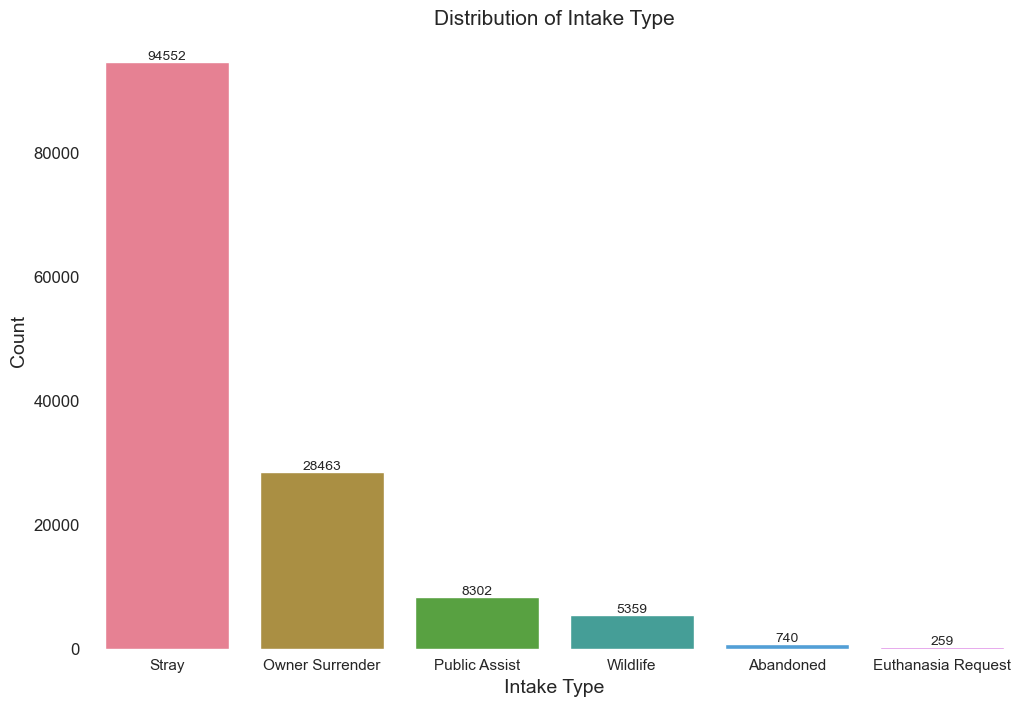

In [29]:
sns.set_style("white")

plt.figure(figsize=(12, 8))

ax = sns.countplot(data=intakes, x="Intake Type", order = intakes["Intake Type"].value_counts().index, palette='husl')
ax.bar_label(ax.containers[0])

plt.title('Distribution of Intake Type', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=11)
plt.xlabel("Intake Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Most of animals were in normal condition during intake.

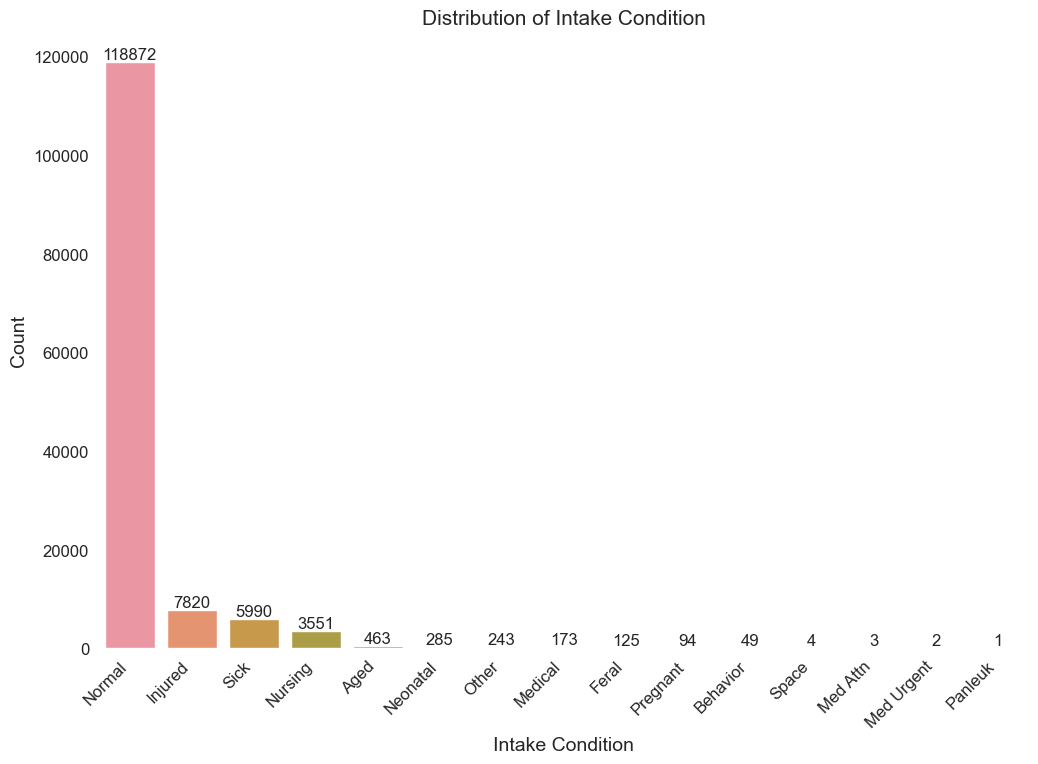

In [30]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=intakes, x="Intake Condition", order = intakes["Intake Condition"].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)

plt.title("Distribution of Intake Condition", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Intake Condition", fontsize=14)
plt.ylabel("Count", fontsize=14)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Majority of animals is intact.

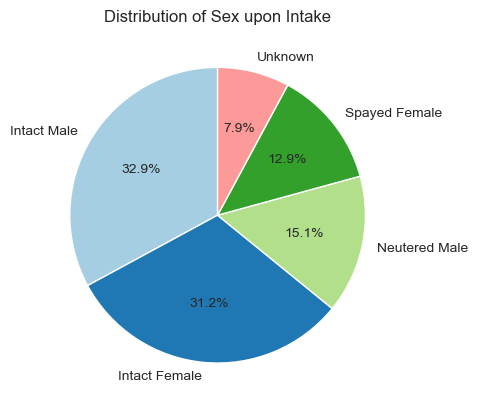

In [31]:
sex_counts = intakes["Sex upon Intake"].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))

plt.title("Distribution of Sex upon Intake")

plt.show()

Let's analyze what is correlation between outcome type of animal and its sex.    

For this task we can take some pieces of function "bivariate_cat_cat_ds" from the second lesson's notebook 03-eda_heart_attack.

In [32]:
# bivariate descriptive statistics for two categorical variables
def bivariate_cat_cat_ds(df1, df2, categorical1, categorical2):
    frequency_table = pd.crosstab(df1[categorical1], df2[categorical2])
    
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g')
    
    plt.show()



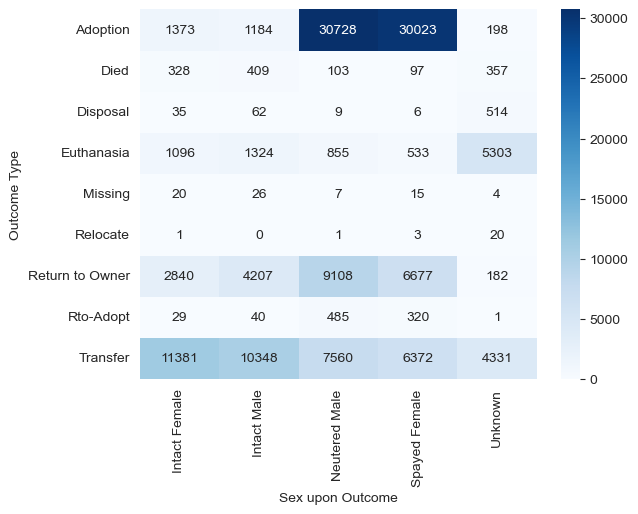

In [33]:
bivariate_cat_cat_ds(outcomes, outcomes, 'Outcome Type', 'Sex upon Outcome')

From this visualisation we can see that people tend to adopt Neutered Male and Spayed Female (which is understandable, less troubles with them).   

Also we can notice that Intact Females and Males transfer a lot and relocation of any animal is not often as well as missing.

### Questions asked

1) Does the type of animal leaving the shelter (Outcome Type) depend on the type of arrival (Intake Type)?    

For answering this question we can use the previous function.

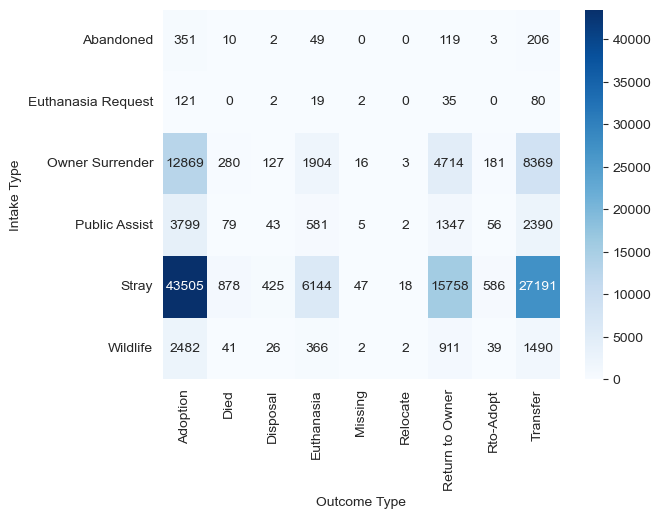

In [34]:
bivariate_cat_cat_ds(intakes, outcomes, 'Intake Type', 'Outcome Type')

From this heatmap we can see that people tend to adopt animals who were homeless (stray) when they were taken, in total there are 43197 animals with this intake type. Also Owner Surrender animals is high number - 13175 of adopted. The same is true for other Outcome Type, so yes there is a dependence between these two features.  

However this feeling of dependence can create the fact that stray and owner surrender animals are the largest categories in whole dataset, which we can see from the next bar plot.

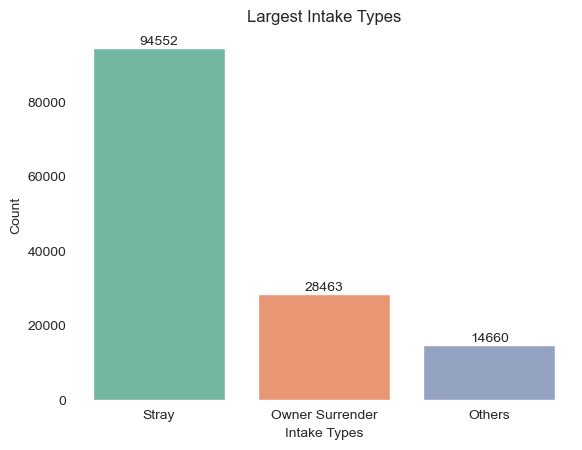

In [35]:
df = pd.DataFrame()
df["Intake Type Grouped"] = intakes["Intake Type"].apply(lambda x: x if x in ['Stray', 'Owner Surrender'] else 'Others')
grouped_counts = df["Intake Type Grouped"].value_counts()

ax = sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette="Set2")
ax.bar_label(ax.containers[0])

plt.title("Largest Intake Types")
plt.xlabel("Intake Types")
plt.ylabel("Count")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

2. Does the age of the animal play a role in adoption?

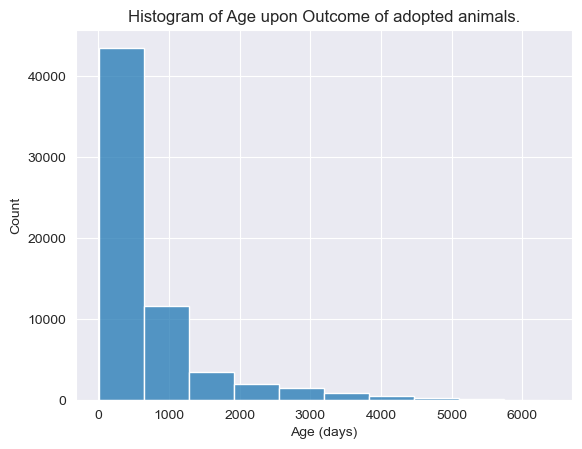

In [36]:
# animals who were adopted
adopted_animals = outcomes[outcomes["Outcome Type"] == "Adoption"]

sns.set_style("darkgrid")

sns.histplot(data=adopted_animals, x="Age upon Outcome", bins=10)
ax.bar_label(ax.containers[0], fontsize=12)

plt.title('Histogram of Age upon Outcome of adopted animals.')
plt.xlabel("Age (days)")
plt.ylabel('Count')

plt.show()

Because of outliers and a lot of animals within interval 0 to 500 days visualisation does not look good, let's group data as we have done in one of the previous tasks.

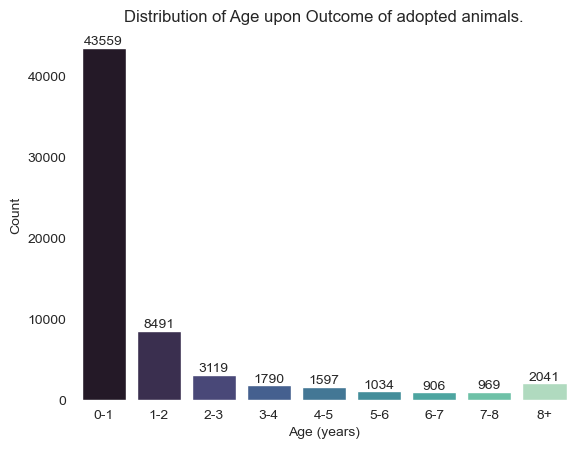

In [37]:
df = pd.DataFrame()
# bin_edges and bin_labels we can use the same
df["Age Group"] = pd.cut(adopted_animals["Age upon Outcome"], bins=bin_edges, labels=bin_labels)

grouped_data = df.groupby("Age Group").size()

sns.set_style("white")

ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='mako')
ax.bar_label(ax.containers[0])

plt.title("Distribution of Age upon Outcome of adopted animals.")
plt.xlabel("Age (years)")
plt.ylabel("Count")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

From the visialisation people certainly are likely to adopt young animals with age 0-1 or 1-2 years than older.

3. Is the intake of animals constant throughout the year or are there periods with higher/lower loads?

Let's group data by four periods of the year - summer, winter, spring and autumn and analyse which periods have higher/lower loads of intakes.

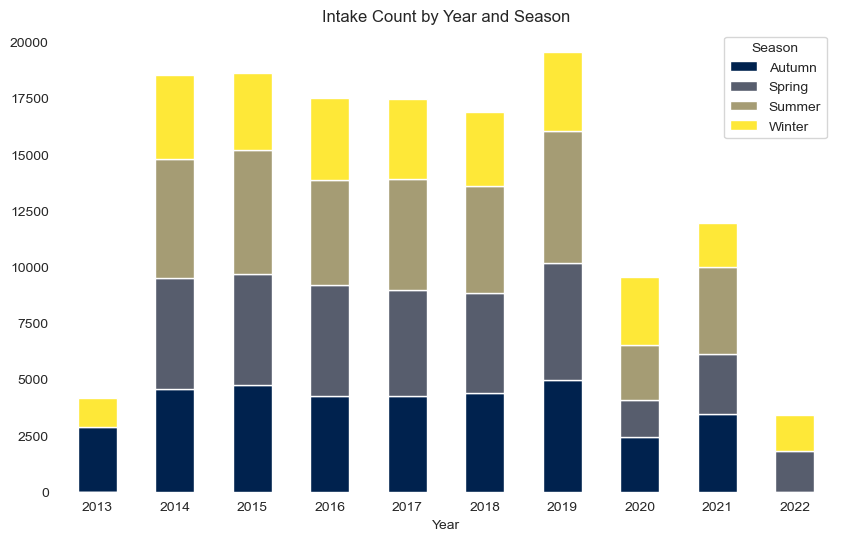

In [38]:
df = pd.DataFrame()

# extract year and period information
df["Year"] = intakes["DateTime"].dt.year
df["Period"] = intakes["DateTime"].dt.month

# map period values to seasons
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
df["Season"] = df["Period"].map(seasons)


# group by year and period and calculate counts
grouped_data = df.groupby(["Year", "Season"]).size().unstack().fillna(0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='cividis')

plt.title("Intake Count by Year and Season")
plt.xticks(rotation=0)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

From the visualisation we can see that there is no explicit high load season, but we can notice that in the winter are less animals (not significantly), which were intaken than in other seasons.

### Own questions

1) What are the most popular colors of animals, which were adopted?

In [39]:
adopted_animals = outcomes[outcomes["Outcome Type"] == "Adoption"]

print("Unique colors of adopted animals - " + str(adopted_animals["Color"].nunique()))
adopted_animals["Color"].value_counts()

Unique colors of adopted animals - 469


Color
Black/White               7139
Black                     5020
Brown Tabby               3741
Brown/White               2213
Tan/White                 2070
                          ... 
Brown Tabby/Lynx Point       0
Brown Tabby/Gray Tabby       0
Seal Point/Brown             0
Seal Point/Buff              0
Yellow/Yellow                0
Name: count, Length: 619, dtype: int64

Because there are too many colors (469), let's select first 5 the most popular.

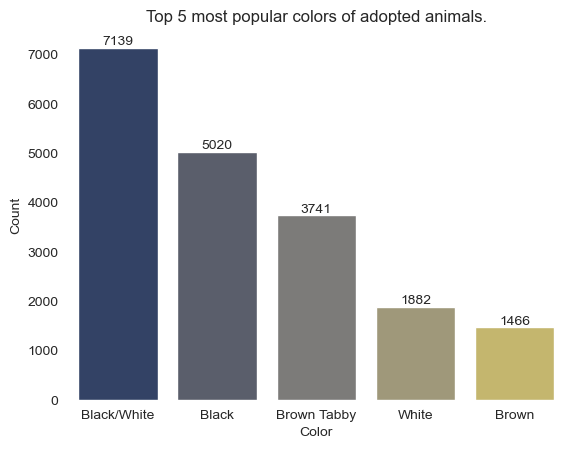

In [40]:
selected_colors = ['Black/White', 'Black', 'Brown Tabby', 'Brown', 'White']
df = pd.DataFrame({"Color": adopted_animals["Color"].apply(lambda x: x if x in selected_colors else None)})

df = df.dropna()
grouped_counts = df["Color"].value_counts()

ax = sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='cividis')
ax.bar_label(ax.containers[0])

plt.title("Top 5 most popular colors of adopted animals.")
plt.ylabel("Count")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

2. Is there any corelation between Intake Type and Animal Type?

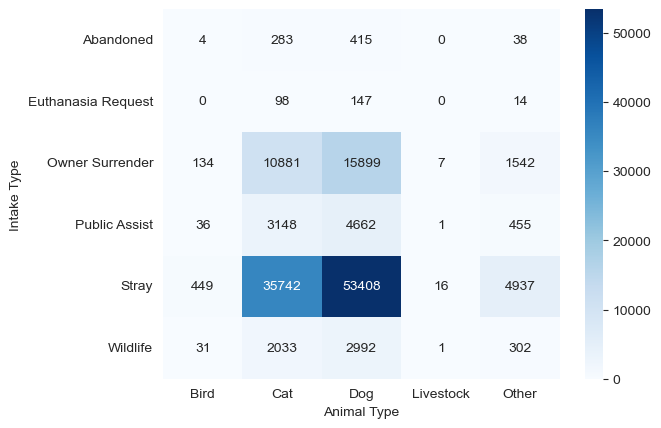

In [41]:
bivariate_cat_cat_ds(intakes, outcomes, 'Intake Type', 'Animal Type')

The largest groups of animals are dogs and cats, we can see that most of them were stray during intake, there are also pretty decent amount of owner surrender animals in comparison to other intake types. Euthanasia Request is the least likely for all animal types as well as Abandoning.  
So yes, there is a certain corelation, if dog or cat was intaken, it is likely stray or owner surrender.

3) Is the outcomes of animals constant throughout the year or are there seasons with higher/lower loads?

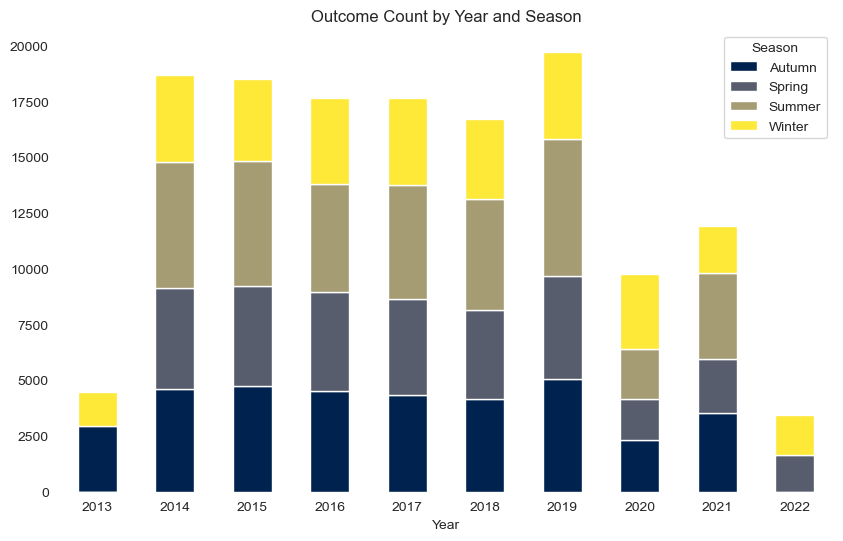

In [42]:
df = pd.DataFrame()

# extract year and period information
df["Year"] = outcomes["DateTime"].dt.year
df["Period"] = outcomes["DateTime"].dt.month

# map period values to seasons
df["Season"] = df["Period"].map(seasons)

# group by year and period and calculate counts
grouped_data = df.groupby(["Year", "Season"]).size().unstack().fillna(0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='cividis')

plt.title("Outcome Count by Year and Season")
plt.xticks(rotation=0)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

The same situation as with intakes. There is no explicit high load season, but in the winter are less animals (not significantly) than in other seasons.